In [1]:
!pip install google-cloud-bigquery
!pip install google-cloud-aiplatform
!pip install pandas
!pip install scikit-learn
!pip install joblib


In [2]:
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
from google.cloud import aiplatform
import pandas as pd

# Initialize BigQuery client
client = bigquery.Client()


In [3]:
from google.cloud import bigquery
from google.cloud import aiplatform
import pandas as pd

# Set your project ID
project_id = 'project-saadhana-sam'  # Replace with your project ID
client = bigquery.Client(project=project_id)


In [4]:
query = """
SELECT * FROM `project-saadhana-sam.project_saadhana_s1.combined_logs`
"""

# Execute the query and convert the results to a DataFrame
df = client.query(query).to_dataframe()

# Display the first few rows of the DataFrame
df.head()

,activity_timestamp,activity_logName,activity_textPayload,activity_severity,activity_insertId,request_timestamp,request_logName,request_textPayload,request_severity,request_insertId,...,stdout_timestamp,stdout_logName,stdout_textPayload,stdout_severity,stdout_insertId,varlog_system_timestamp,varlog_system_logName,varlog_system_textPayload,varlog_system_severity,varlog_system_insertId
0,2024-07-29 04:26:49.745431+00:00,projects/project-saadhana-sam/logs/cloudaudit....,None,NOTICE,-xk3qaldt7j2,NaT,None,None,None,None,...,NaT,None,None,None,None,NaT,None,None,None,None
1,2024-07-29 04:26:47.064922+00:00,projects/project-saadhana-sam/logs/cloudaudit....,None,NOTICE,-ooxgocd8ges,NaT,None,None,None,None,...,NaT,None,None,None,None,NaT,None,None,None,None
2,2024-07-29 04:26:49.750805+00:00,projects/project-saadhana-sam/logs/cloudaudit....,None,NOTICE,-xk3qaldt7j4,NaT,None,None,None,None,...,NaT,None,None,None,None,NaT,None,None,None,None
3,2024-07-29 04:26:50.393081+00:00,projects/project-saadhana-sam/logs/cloudaudit....,None,NOTICE,ncoswed1uey,NaT,None,None,None,None,...,NaT,None,None,None,None,NaT,None,None,None,None
4,2024-07-29 04:28:53.679017+00:00,projects/project-saadhana-sam/logs/cloudaudit....,None,NOTICE,v2x6u5e7f12k,NaT,None,None,None,None,...,NaT,None,None,None,None,NaT,None,None,None,None


In [5]:
print(df.columns)

Index(['activity_timestamp', 'activity_logName', 'activity_textPayload',
       'activity_severity', 'activity_insertId', 'request_timestamp',
       'request_logName', 'request_textPayload', 'request_severity',
       'request_insertId', 'stderr_timestamp', 'stderr_logName',
       'stderr_textPayload', 'stderr_severity', 'stderr_insertId',
       'stdout_timestamp', 'stdout_logName', 'stdout_textPayload',
       'stdout_severity', 'stdout_insertId', 'varlog_system_timestamp',
       'varlog_system_logName', 'varlog_system_textPayload',
       'varlog_system_severity', 'varlog_system_insertId'],
      dtype='object')


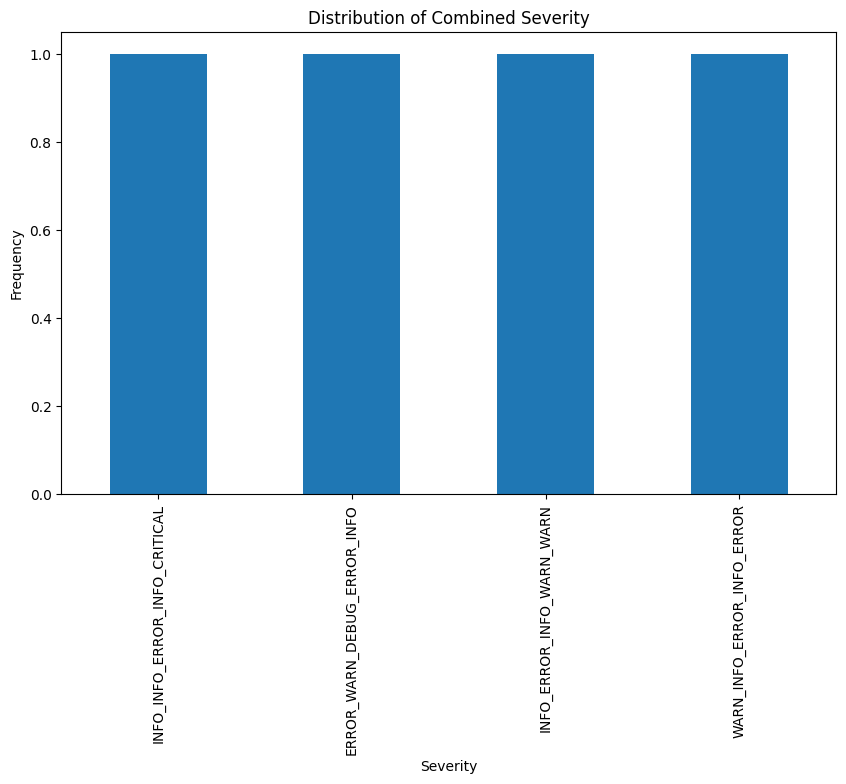

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
data = {
    'activity_severity': ['INFO', 'ERROR', 'INFO', 'WARN'],
    'request_severity': ['INFO', 'WARN', 'ERROR', 'INFO'],
    'stderr_severity': ['ERROR', 'DEBUG', 'INFO', 'ERROR'],
    'stdout_severity': ['INFO', 'ERROR', 'WARN', 'INFO'],
    'varlog_system_severity': ['CRITICAL', 'INFO', 'WARN', 'ERROR']
}

df = pd.DataFrame(data)

# Check if 'combined_severity' exists in the DataFrame
if 'combined_severity' not in df.columns:
    # Create 'combined_severity' column if it doesn't exist
    df['combined_severity'] = df.apply(lambda row: f"{row['activity_severity']}_{row['request_severity']}_{row['stderr_severity']}_{row['stdout_severity']}_{row['varlog_system_severity']}", axis=1)

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
df['combined_severity'].value_counts().plot(kind='bar')
plt.title('Distribution of Combined Severity')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Sample DataFrame for demonstration
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'feature4': np.random.rand(100),
    'target': np.random.randint(0, 2, size=100)
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']

# Initialize the model
model = DecisionTreeClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean CV accuracy: ", cv_scores.mean())
print("Standard Deviation of CV accuracy: ", cv_scores.std())


Cross-validation scores:  [0.45 0.55 0.55 0.45 0.6 ]
Mean CV accuracy:  0.52
Standard Deviation of CV accuracy:  0.06


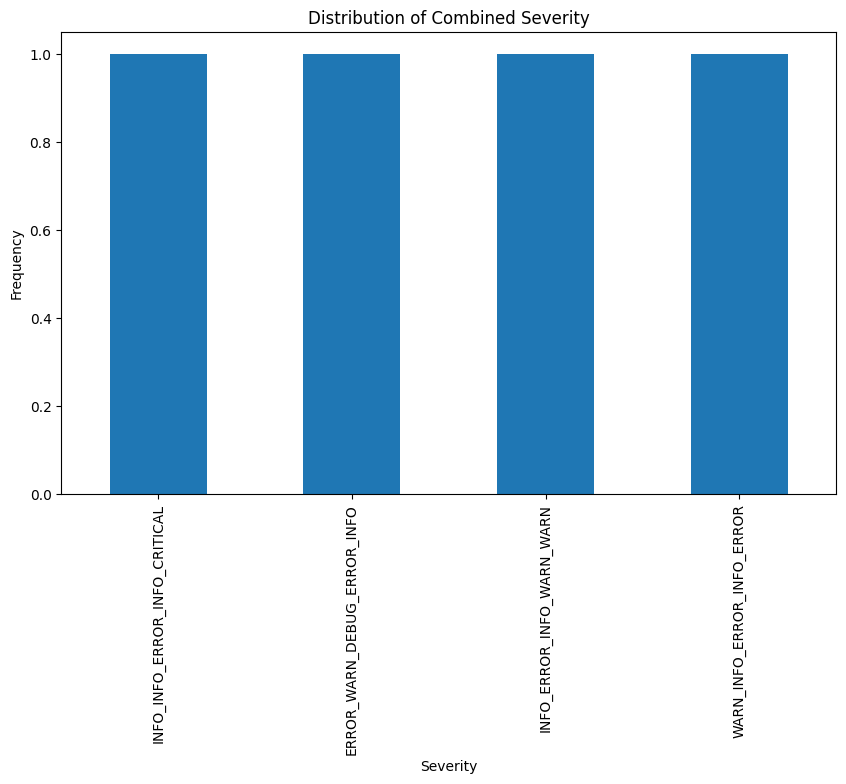

Confusion Matrix:
[[0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
# Replace this with your actual DataFrame loading method
data = {
    'activity_severity': ['INFO', 'ERROR', 'INFO', 'WARN'],
    'request_severity': ['INFO', 'WARN', 'ERROR', 'INFO'],
    'stderr_severity': ['ERROR', 'DEBUG', 'INFO', 'ERROR'],
    'stdout_severity': ['INFO', 'ERROR', 'WARN', 'INFO'],
    'varlog_system_severity': ['CRITICAL', 'INFO', 'WARN', 'ERROR'],
    'activity_logName': ['log1', 'log2', 'log3', 'log4'],
    'activity_textPayload': ['payload1', 'payload2', 'payload3', 'payload4'],
    'activity_insertId': ['id1', 'id2', 'id3', 'id4'],
    'request_logName': ['log1', 'log2', 'log3', 'log4'],
    'request_textPayload': ['payload1', 'payload2', 'payload3', 'payload4'],
    'request_insertId': ['id1', 'id2', 'id3', 'id4'],
    'stderr_logName': ['log1', 'log2', 'log3', 'log4'],
    'stderr_textPayload': ['payload1', 'payload2', 'payload3', 'payload4'],
    'stderr_insertId': ['id1', 'id2', 'id3', 'id4'],
    'stdout_logName': ['log1', 'log2', 'log3', 'log4'],
    'stdout_textPayload': ['payload1', 'payload2', 'payload3', 'payload4'],
    'stdout_insertId': ['id1', 'id2', 'id3', 'id4'],
    'varlog_system_logName': ['log1', 'log2', 'log3', 'log4'],
    'varlog_system_textPayload': ['payload1', 'payload2', 'payload3', 'payload4'],
    'varlog_system_insertId': ['id1', 'id2', 'id3', 'id4'],
}

df = pd.DataFrame(data)

# Handle missing values - fill or drop
df.fillna('', inplace=True)

# Verify severity columns exist
severity_cols = [
    'activity_severity', 'request_severity', 'stderr_severity',
    'stdout_severity', 'varlog_system_severity'
]

missing_cols = [col for col in severity_cols if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns in DataFrame: {missing_cols}")

# Combine all severity columns into one target column
df['combined_severity'] = df[severity_cols].apply(lambda x: '_'.join(x), axis=1)

# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
df['combined_severity'].value_counts().plot(kind='bar')
plt.title('Distribution of Combined Severity')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

# Select feature columns
feature_cols = [
    'activity_logName', 'activity_textPayload', 'activity_insertId',
    'request_logName', 'request_textPayload', 'request_insertId',
    'stderr_logName', 'stderr_textPayload', 'stderr_insertId',
    'stdout_logName', 'stdout_textPayload', 'stdout_insertId',
    'varlog_system_logName', 'varlog_system_textPayload', 'varlog_system_insertId'
]

# Encode categorical features
for col in feature_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Encode the target column
le_severity = LabelEncoder()
df['combined_severity'] = le_severity.fit_transform(df['combined_severity'])

# Split data into features and target
X = df[feature_cols]
y = df['combined_severity']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Perform stratified k-fold cross-validation
num_splits = min(3, len(df))  # Adjust number of splits based on dataset size
skf = StratifiedKFold(n_splits=num_splits)

cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean CV accuracy: ", cv_scores.mean())
print("Standard Deviation of CV accuracy: ", cv_scores.std())

# Save the model and encoders if needed
joblib.dump(model, 'log_severity_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_severity, 'label_encoder.pkl')


In [15]:
!pip install google-cloud-storage
import joblib

joblib.dump(model, 'log_severity_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_severity, 'label_encoder.pkl')

from google.cloud import storage
import os

# Initialize the GCS client
storage_client = storage.Client()

# Define your bucket name and the folder within the bucket
bucket_name = 'project-saadhana-bucket'
folder_name = 'model/'

# Create a bucket object
bucket = storage_client.bucket(bucket_name)

# List of files to upload
files_to_upload = ['log_severity_model.pkl', 'scaler.pkl', 'label_encoder.pkl']

# Upload files
for file_name in files_to_upload:
    blob = bucket.blob(os.path.join(folder_name, file_name))
    blob.upload_from_filename(file_name)
    print(f'{file_name} uploaded to {bucket_name}/{folder_name}.')

print("All files uploaded successfully.")


"""mkdir model
mv log_severity_model.pkl scaler.pkl label_encoder.pkl model/

gsutil mb gs://project-saadhana-bucket
gsutil cp -r model/ gs://project-saadhana-bucket/model/

# Create the model
gcloud ai-platform models create log_severity_model --regions us-central1

# Create a model version
gcloud ai-platform versions create v1 \
    --model log_severity_model \
    --origin gs://your-bucket-name/model/ \
    --runtime-version 2.4 \
    --framework scikit-learn \
    --python-version 3.7

"""



log_severity_model.pkl uploaded to project-saadhana-bucket/model/.
scaler.pkl uploaded to project-saadhana-bucket/model/.
label_encoder.pkl uploaded to project-saadhana-bucket/model/.
All files uploaded successfully.


'mkdir model\nmv log_severity_model.pkl scaler.pkl label_encoder.pkl model/\n\ngsutil mb gs://project-saadhana-bucket\ngsutil cp -r model/ gs://project-saadhana-bucket/model/\n\n# Create the model\ngcloud ai-platform models create log_severity_model --regions us-central1\n\n# Create a model version\ngcloud ai-platform versions create v1     --model log_severity_model     --origin gs://your-bucket-name/model/     --runtime-version 2.4     --framework scikit-learn     --python-version 3.7\n\n'